# Minimal example

## Import relevant libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\jackm\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jackm\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jackm\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jackm\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low = 10, high = 10, size = (observations,1))
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))

generated_inputs = np.column_stack ((xs,zs))

noise = np.random.uniform(-1,1, (observations, 1))

generated_targets = 2 * xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

## Solving with TensorFlow

In [3]:
input_size = 2
output_size = 1

## Outlining the model

In [4]:
inputs = tf.placeholder(tf.float32,[None, input_size])
targets = tf.placeholder(tf.float32,[None, output_size]) ## won't execute until told what to do in TF1 
## variables retain value while placeholders don't 
## feed data into placeholders and vary variables, comparing inputs to targets

In [5]:
weights = tf.Variable(tf.random_uniform([input_size,output_size], minval=-0.1,maxval= 0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval = 0.1))

In [6]:
outputs = tf.matmul(inputs,weights) + biases ## matmul is like dot product, but generalised for tensors

## Choosing the objective function and optimization method 

In [7]:
mean_loss = tf.losses.mean_squared_error(labels = targets, predictions = outputs) / 2. ## dot makes sure float
## losses contain most of common loss functions 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss) ## minimise mean loss for optimization
# train contains common optimization algorithms

## Prepare for execution

In [9]:
## no code has been executed until now
# training happens in sessions (sess short for sessions) 
# interactive session class means time to execute 

sess = tf.InteractiveSession()

## Initialising variables 

In [10]:
initializer = tf.global_variables_initializer()
# set initial values for weights and biases before they change during training, as a result of placeholder values
## global variables initializer initializes all objects marked as variables 
# weights and biases are only ones declared like that, so only them will be affected
sess.run(initializer) ## now initlized variales through the session

## Loading training data

In [11]:
training_data = np.load('TF_intro.npz') ## if found on directory of computer, otherwise entire path needed

## Learning

In [12]:
for e in range(100):
    _, curr_loss = sess.run([optimizer, mean_loss], ## want to run optimizer and loss function
                           feed_dict = {inputs: training_data['inputs'],targets: training_data['targets']}) 
    print(curr_loss)
# feed dict tells computer how data is going to be fed
# placeholder:data format 
# means run the optimize and mean loss operations by feeding the placeholder objects with data specified in feed dict parameter

# _ means disregard the return value of optimize, since it returns none 



472.8079
5223.858
84483.805
1385181.8
22720282.0
372671230.0
6112772600.0
100265220000.0
1644608500000.0
26975834000000.0
442473370000000.0
7257703000000000.0
1.1904515e+17
1.9526483e+18
3.2028466e+19
5.2534944e+20
8.6170873e+21
1.41342475e+23
2.3183809e+24
3.802743e+25
6.2374795e+26
1.0231081e+28
1.6781615e+29
2.7526168e+30
4.515003e+31
7.4057705e+32
1.2147373e+34
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


## Plotting the data

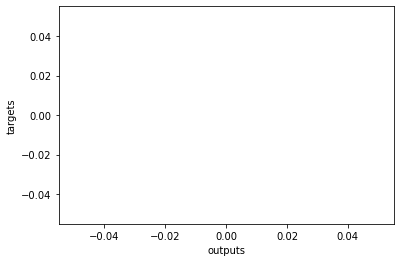

In [13]:
out = sess.run([outputs],
              feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()